echantillon 1==> [ 7.56412523  8.79680643  8.28895238  5.29345596  6.89194736  0.39338649
  6.13086849  4.817959   -0.0760331   6.09663448  5.99520561  5.4625648
 14.15055832  7.73132323  2.41126032  0.90939486  6.97840269  3.62691509
  1.18357561  7.67121015  8.82761414 11.51451522 -4.35372178  2.63736977
 -6.90312372  1.17640942 -1.4977603   9.07705712  7.56563309  8.99729485
  6.30540921  2.8251632   0.62384613  9.62185368 -4.59312316  3.52019369
  4.0147899   2.06318005 10.07252721 -1.97640637 -0.61045663  0.42533961
  5.94192209 -0.32356241  5.1201346   4.39001502  0.90945273  9.2389414
  9.64531271  4.06178084]

echantilon 2 ==> [ 7.50312457  6.5487804   3.50275246 -0.45874278  2.17869279  3.75056822
  7.31512763  4.72269059 -0.75126848 -0.10206302 -1.34273278  8.967325
  0.60930995 11.74288796  3.24982636 -0.88158995  6.00115813 13.6183154
  3.30450826 -2.34788249  0.22456528  1.61662169  0.73116866  3.14457089
  2.02964558 -1.42335581  4.09829773 -1.5095595   0.23442809 13.5725

Votre Choix : 1


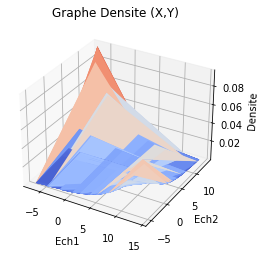

1==>Graphe Densite(x,y), 2==>Histogramme(x,y), 3==>Quitter



Votre Choix : 2


50


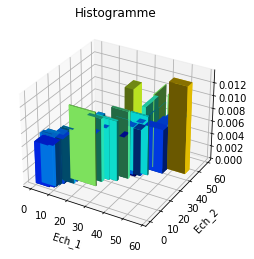

1==>Graphe Densite(x,y), 2==>Histogramme(x,y), 3==>Quitter



In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator

def generer_echantillon_1():
    x_1=np.random.randint(0,10,50)
    mu_x=np.mean(x_1)
    sd_x=np.mean(x_1)
    x=np.random.normal(mu_x,sd_x,50)
    return x

def generer_echantillon_2():
    x_2=np.random.randint(0,10,50)
    mu_x2=np.mean(x_2)
    sd_x2=np.mean(x_2)
    y=np.random.normal(mu_x2,sd_x2,50)
    return y

def covariance(x,y):
    mu_x=np.mean(x)
    mu_y=np.mean(y)
    n=len(x)
    cov=np.sum(((x*y))-(mu_x*mu_y))/n
    return cov


def densite(x,y):
    mu_x=np.mean(x)
    mu_y=np.mean(y)
    sd_x=np.std(x)
    sd_y=np.std(y)
    cov=covariance(x,y)
    coef_cor=cov/(mu_x*mu_y) 
    densite=(1/(2*np.pi*sd_x*sd_y*np.sqrt(1-coef_cor**2)))*np.exp((-0.5)*((x-mu_x)/sd_x)*((y-mu_y)/sd_y)-2*coef_cor*(((x-mu_x)*(y-mu_y))/(sd_x*sd_y)))*(1/(1-coef_cor**2))
    return densite
    


def histograme(x,y):
    mu_x=np.mean(x)
    mu_y=np.mean(y)
    sd_x=np.std(x)
    sd_y=np.std(y)
    cov=covariance(x,y)
    coef_cor=cov/(mu_x*mu_y)
    f_densite=densite(x,y)
    fig1=plt.figure()
    ax1=plt.axes(projection="3d")
    position_x=np.arange(50)
    position_y=np.arange(50)
    position_z=np.zeros(50)
    print(len(position_z))
    
    cmap = cm.get_cmap('jet') 
    rgba = [cmap((i-np.min(densite(x,y)))/np.max(densite(x,y))) for i in densite(x,y)] #range Du color bar  
    #plt.hist([x,y],20,rwidth=0.4,color=["red","blue"],edgecolor="green",density=True)
    ax1.bar3d(position_x,position_y,position_z,x,y,densite(x,y),color=rgba)
    plt.title("Histogramme")
    ax1.set_xlabel("Ech_1")
    ax1.set_ylabel("Ech_2")
    #ax1.set_zlabel("")
    plt.show()



def main(): 
    x=generer_echantillon_1()
    y=generer_echantillon_2()
    mu_x=np.mean(x)
    mu_y=np.mean(y)
    sd_x=np.std(x)
    sd_y=np.std(y)
    cov=covariance(x,y)
    coef_cor=cov/(mu_x*mu_y) 
    
    print("echantillon 1==>",x)
    print("")
    print("echantilon 2 ==>",y)
    print("")
    print("moyen echantillon 1 ==>",mu_x)
    print("ecart type echantillon 1==>",sd_x)
    print("")
    print("moyen echatillon 2 ==>",mu_y)
    print("ecrat type echantillon 2 ==>",sd_y)
    print("")
    print("Covariance(x,y)==>",cov)
    print("coefficient Coorelation(X,Y)==>",coef_cor)
    print("")
    print("Densite(x,y)==>",densite(x,y))
    print("")
    
    
    
    for i in range(10):
        print("1==>Graphe Densite(x,y), 2==>Histogramme(x,y), 3==>Quitter")
        print("")
        choix=int(input("Votre Choix :"))
        if(choix==1):
            X,Y=np.meshgrid(x,y)
            #print(A)
            #print(B)
            Z=densite(X,Y)
            #print(Z)
            fig=plt.figure()
            ax=plt.gca(projection='3d')
            ax.plot_surface(X,Y,Z,linewidth=2,linestyle="--",antialiased=True,label="test",cmap=cm.coolwarm) #cmap=cm.coolwarm 
            #ax.scatter(A,B,Z)
            #ax.plot_wireframe(A,B,Z,rstride=10, cstride=10)
            ax.set_xlabel("Ech1")
            ax.set_ylabel("Ech2")
            ax.set_zlabel("Densite")
            ax.set_title("Graphe Densite (X,Y)")
            #ax.set_ylim(0,20)
            #ax.set_xlim(0,20)
            #ax.set_zlim(0,20)
            #ax.view_init(60, 20)
            #ax.set_legend(loc=9)
            #plt.savefig("Graphique.png", dpi=300)
            plt.show()
        if(choix==2):
            histograme(x,y)
    
        if(choix==3):
            break
        
main()
    



echantillon 1==> [-0.15409054 12.81519775  6.77364003 11.19054637  3.04412618  8.40403751
  4.27240163  7.64990248  1.76831306  0.75056866 12.14797325  7.37743387
  7.89496471  3.97381966  5.45636594  8.02012163  6.84941679  3.30985887
 -4.20218351 10.61745642  1.78453905  9.93331261 -1.58699962  1.05824993
  2.73604858  8.45957886 -0.9845511  13.45730287 -4.38297517  5.71862819
  4.79136523  0.13776789  5.6426758  12.28801818  9.80764459  5.35020853
  2.38755642  2.6563048   3.58812187  7.75496444  7.12206444  8.25463136
  7.41947325  9.10968506  5.84527305  3.15190251 -5.33796018 -2.33999241
  2.6024033   5.88496046 -3.08695653  9.3134748   0.38175922  3.69242869
  5.68735919  9.986416    4.95108743  2.08029029  8.41792383 -0.14434289
  4.61555167  8.46300915  3.68247888  7.63320983 -6.40051626  5.91404057
  5.76644316  6.941488   -3.23767427 -0.56911961  2.94225304 -0.60731268
  1.73320553 15.4576517   5.39601803  8.31116505  0.69388629  3.71409175
  6.89711964  0.04814662 10.253112

votre Choix : 1


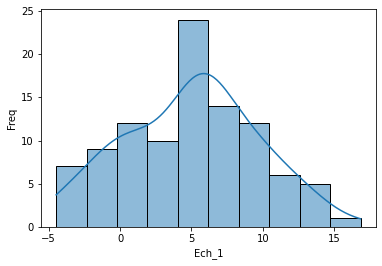


LoiNormaleUnivarie==>1 , LoiNormaleBivariee_Histogramme et Densite==>2
LoiNormaleBivariee_Histogramme et Echantillon==>3 ,4==>Comparison_Densite , 5==>Quitter



votre Choix : 2


c:\users\packard bell\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\packard bell\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


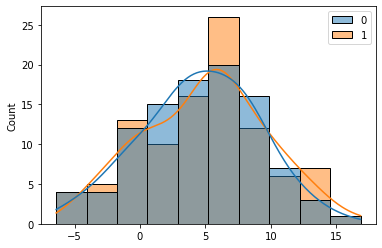

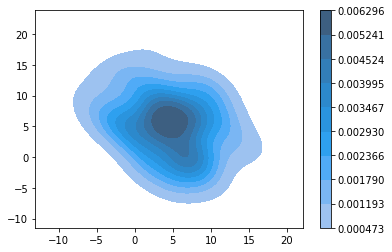


LoiNormaleUnivarie==>1 , LoiNormaleBivariee_Histogramme et Densite==>2
LoiNormaleBivariee_Histogramme et Echantillon==>3 ,4==>Comparison_Densite , 5==>Quitter



votre Choix : 3


c:\users\packard bell\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

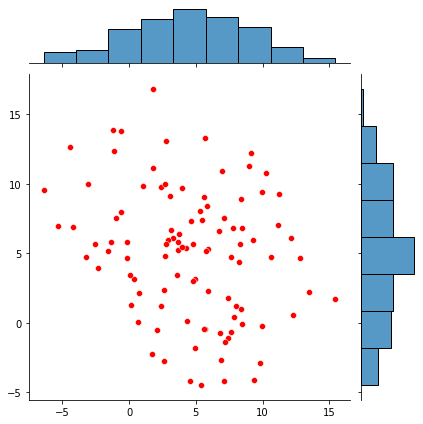


LoiNormaleUnivarie==>1 , LoiNormaleBivariee_Histogramme et Densite==>2
LoiNormaleBivariee_Histogramme et Echantillon==>3 ,4==>Comparison_Densite , 5==>Quitter



votre Choix : 4


c:\users\packard bell\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\packard bell\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\users\packard bell\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will r

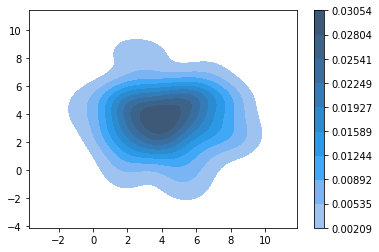

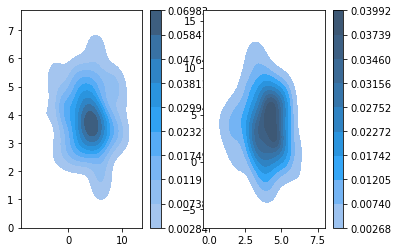

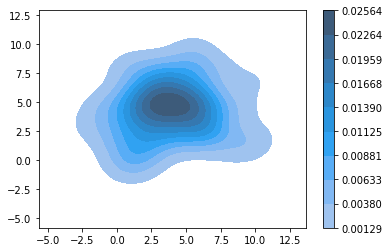

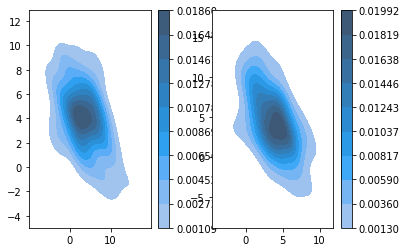

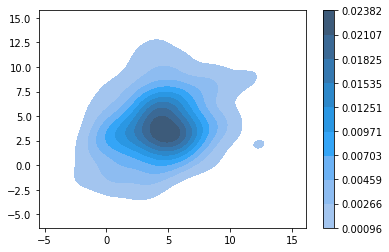

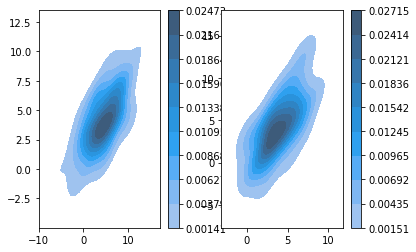


LoiNormaleUnivarie==>1 , LoiNormaleBivariee_Histogramme et Densite==>2
LoiNormaleBivariee_Histogramme et Echantillon==>3 ,4==>Comparison_Densite , 5==>Quitter



In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from scipy.stats import norm
from scipy.stats import multivariate_normal
import seaborn as sns

def generer_echantillon_1():
    x_1=np.random.randint(0,10,100)
    mu_x1=np.mean(x_1)
    sd_x1=np.mean(x_1)
    x=np.random.normal(mu_x1,sd_x1,100)
    return x

def generer_echantillon_2():
    x_2=np.random.randint(0,10,100)
    mu_x2=np.mean(x_2)
    sd_x2=np.mean(x_2)
    y=np.random.normal(mu_x2,sd_x2,100)
    return y

def generer_echantillon_3():
    x_3=np.random.randint(0,10,100)
    mu_x3=np.mean(x_3)
    sd_x3=np.mean(x_3)
    z=np.random.normal(mu_x3,sd_x3,100)
    return z

def covariance(x,y):
    mu_x=np.mean(x)
    mu_y=np.mean(y)
    n=len(x)
    cov=np.sum(((x*y))-(mu_x*mu_y))/n
    return cov


def densite_univarie(x):
    mu_x=np.mean(x)
    sd_x=np.std(x)
    #densite=norm.pdf(x)
    #print(densite,"\n")
    #print(mu_x,sd_x)
    #print(x)
    sns.histplot(x,kde=True,bins=10) 
    #sns.kdeplot(x,fill = True, bw = 0.5) 
    plt.xlabel('Ech_1')
    plt.ylabel("Freq")
    plt.show()
    
def densite_bivarie(x,y):
    mu_x=np.mean(x)
    sd_x=np.std(x)
    mu_y=np.mean(y)
    sd_y=np.std(y)
    #densite=norm.pdf(x)
    #print(densite,"\n")
    #print(mu_x,sd_x)
    #print(x)
    
    fig1=plt.figure()
    ax2=fig1.add_subplot(1,1,1)
    sns.histplot([x,y],kde=True,bins=10) 
   
    
    fig2=plt.figure()
    fig2.add_subplot(1,1,1)
    sns.kdeplot(x,y, fill = True,bw=0.5,cbar=True)
    plt.show()

def densite_histo_bivar(x,y):
    mu_x=np.mean(x)
    sd_x=np.std(x)
    mu_y=np.mean(y)
    sd_y=np.std(y)
    fig=plt.figure()
    sns.jointplot(x,y, joint_kws = {'color': 'red'})
    #sns.jointplot(x,y,kind="reg")
    plt.show()

def Compa_Densite():
    #x=np.random.normal(0,2.5,100)
    #y=np.random.normal(0,2.5,100)
    #mu_x=0
    #mu_y=0
    #var_x=np.sqrt(2.5)
    #var_y=np.sqrt(2.5)
    #print(np.cov(x,y))
    #print("echantillon 3==>",z)
    #f=norm.rvs(size=300) 
    #p=np.dstack((x,y,z))
    #print(pos)
    fig1=plt.figure()
    fig1.add_subplot(1,1,1)
    x,y=sp.random.multivariate_normal([4,4],[[4,0],[0,4]],100).T #Cloche Centree
    sns.kdeplot(x,y,fill = True,bw=0.5,cbar=True)
    
    fig5=plt.figure()
    fig5.add_subplot(1,2,1)
    x,y=sp.random.multivariate_normal([4,4],[[10,0],[0,1]],100).T #etalement vers Axe1
    sns.kdeplot(x,y,fill=True,bw=0.5,cbar=True)
    
    fig5.add_subplot(1,2,2)
    x,y=sp.random.multivariate_normal([4,4],[[1,0],[0,10]],100).T #etalment vers Axe2
    sns.kdeplot(x,y,fill=True,bw=0.5,cbar=True)
    
    
    fig2=plt.figure()
    fig2.add_subplot(1,1,1)
    x,y=sp.random.multivariate_normal([4,4],[[1,-6],[6,1]],100).T #correlation Negative
    sns.kdeplot(x,y,fill=True,bw=0.5,cbar=True)
    
    fig6=plt.figure()
    fig6.add_subplot(1,2,1)
    x,y=sp.random.multivariate_normal([4,4],[[10,-6],[6,1]],100).T #correlation Negative ,Etalamnet vers Axe 1
    sns.kdeplot(x,y,fill=True,bw=0.5,cbar=True)
    
    fig6.add_subplot(1,2,2)
    x,y=sp.random.multivariate_normal([4,4],[[1,6],[-6,10]],100).T #correlation Negative , Etalement vers Axe 2
    sns.kdeplot(x,y,fill=True,bw=0.5,cbar=True)
    
    
    
    
    fig3=plt.figure()
    fig3.add_subplot(1,1,1)
    x,y=sp.random.multivariate_normal([4,4],[[1,6],[6,1]],100).T #Coorelation Positive centree
    sns.kdeplot(x,y,fill=True,bw=0.5,cbar=True)
    
    fig7=plt.figure()
    fig7.add_subplot(1,2,1)
    x,y=sp.random.multivariate_normal([4,4],[[10,6],[6,1]],100).T #Coorelation Positive ,etalement vers Axe 1
    sns.kdeplot(x,y,fill=True,bw=0.5,cbar=True)
    
    fig7.add_subplot(1,2,2)
    x,y=sp.random.multivariate_normal([4,4],[[1,6],[6,10]],100).T #Coorelation Positive , etalement vers Axe 2
    sns.kdeplot(x,y,fill=True,bw=0.5,cbar=True)
    #fig.view_init(60,60)
    plt.show()
    
    
    
    
def main():
    x=generer_echantillon_1()
    y=generer_echantillon_2()
    z=generer_echantillon_3()
    
    mu_x=np.mean(x)
    mu_y=np.mean(y)
    sd_x=np.std(x)
    sd_y=np.std(y)
    cov=covariance(x,y)
    coef_cor=cov/(mu_x*mu_y) 
    
    print("echantillon 1==>",x)
    print("")
    print("echantilon 2 ==>",y)
    print("")
    print("moyen echantillon 1 ==>",mu_x)
    print("ecart type echantillon 1==>",sd_x)
    print("")
    print("moyen echatillon 2 ==>",mu_y)
    print("ecrat type echantillon 2 ==>",sd_y)
    print("")
    print("Covariance(x,y)==>",cov)
    print("coefficient Coorelation(X,Y)==>",coef_cor)
    print("")
    for i in range(10):
        print("")
        print("LoiNormaleUnivarie==>1 , LoiNormaleBivariee_Histogramme et Densite==>2") 
        print("LoiNormaleBivariee_Histogramme et Echantillon==>3 ,4==>Comparison_Densite , 5==>Quitter")
        print("")
        choix=int(input("votre Choix :"))
        if(choix==1):
            densite_univarie(y)
        if(choix==2):
            densite_bivarie(x,y)
        if(choix==3):
            densite_histo_bivar(x,y)
        if(choix==4):
            Compa_Densite()
        if(choix==5):
            break
main()
